### Create a function to create new descriptor datasets with varying numbers of entries

In [2]:
import json
from num2words import num2words
from random import shuffle

with open('descriptors/descriptors_cub.json') as cub:
    cub_dict = json.load(cub)

with open('descriptors/descriptors_cub_gpt4_generated_descriptors.json') as generated_desc:
    generated_desc_dict = json.load(generated_desc)

for i in range(1, 9):
    
    list_name = f"{num2words(i)}_desc_list"
    dict_name = f"{num2words(i)}_desc_dict"
    globals()[list_name] = []
    globals()[dict_name] = {}

    for k, v in cub_dict.items():
        desc_list = generated_desc_dict[k]
        shuffled_desc_list = desc_list[:]
        shuffle(shuffled_desc_list)

        if len(shuffled_desc_list) > i:
            shuffled_desc_list = shuffled_desc_list[:i]
        
        globals()[list_name] = shuffled_desc_list
        globals()[dict_name][k] = globals()[list_name]

    print(dict_name, len(globals()[dict_name][k]), globals()[dict_name])

    with open(f'descriptors/descriptors_cub_gpt4_{i}_descriptors.json', 'w') as gpt4_desc:
        json.dump(globals()[dict_name], gpt4_desc, indent=4)

one_desc_dict 1 {'Black-footed Albatross': ['Possesses a striking white head and neck, providing a stark contrast to its dark body'], 'Laysan Albatross': ['Equipped with long, hooked bill and webbed feet for effective foraging'], 'Sooty Albatross': ['Has a distinctive white band around its neck, setting it apart from similar species'], 'Groove-billed Ani': ['Features a sleek black plumage with a notable white stripe above the eyes'], 'Crested Auklet': ['Utilizes its black bill for feeding in marine environments'], 'Least Auklet': ['Has black legs and feet, consistent with its overall color scheme'], 'Parakeet Auklet': ['Employs a short, black tail for maneuvering in tight coastal niches'], 'Rhinoceros Auklet': ['Characterized by a large, bulbous bill, resembling that of a rhinoceros'], 'Brewer Blackbird': ['Features subtle white spots on wings, visible during flight'], 'Red-winged Blackbird': ['Possesses a sleek, yellow beak, used for various feeding habits'], 'Rusty Blackbird': ['Exhi

In [11]:
import json
from num2words import num2words
from random import shuffle

for i in range(1, 9):
    
    dict_name = f"{num2words(i)}_desc_dict"
    with open(f'descriptors/descriptors_cub_gpt4_{i}_descriptors.json') as gpt4_desc:
        globals()[dict_name] = json.load(gpt4_desc)

    value_length = []
    for k, v in cub_dict.items():
        value_length.append(len(globals()[dict_name][k][0]))

    print(dict_name, len(globals()[dict_name][k]), "||", sum(value_length)/len(value_length), value_length)

one_desc_dict 1 || 51.28 [85, 70, 83, 73, 58, 65, 67, 71, 59, 63, 83, 74, 28, 59, 40, 79, 59, 62, 32, 45, 68, 58, 52, 59, 37, 39, 55, 54, 57, 62, 27, 52, 63, 36, 38, 49, 46, 43, 65, 60, 50, 44, 25, 69, 70, 63, 63, 42, 84, 57, 77, 60, 79, 71, 63, 83, 106, 57, 61, 43, 37, 56, 53, 49, 65, 41, 44, 44, 59, 62, 52, 47, 61, 59, 51, 55, 64, 61, 61, 43, 59, 33, 33, 58, 54, 68, 70, 26, 36, 26, 26, 54, 41, 65, 64, 40, 54, 69, 67, 51, 57, 38, 59, 57, 53, 51, 60, 51, 34, 66, 33, 54, 62, 55, 42, 45, 45, 49, 22, 58, 53, 61, 25, 49, 46, 51, 49, 46, 53, 52, 35, 62, 26, 54, 37, 49, 53, 44, 37, 26, 74, 50, 18, 27, 65, 50, 67, 49, 61, 54, 66, 46, 68, 48, 80, 27, 44, 54, 45, 54, 25, 35, 26, 35, 23, 37, 28, 33, 57, 32, 55, 30, 37, 65, 61, 38, 23, 30, 29, 38, 43, 44, 19, 66, 71, 67, 49, 56, 50, 62, 50, 48, 27, 45, 65, 56, 29, 23, 48, 55]
two_desc_dict 2 || 48.6 [48, 70, 78, 63, 50, 74, 49, 74, 54, 81, 66, 87, 28, 54, 57, 42, 56, 61, 38, 65, 47, 58, 54, 45, 80, 56, 68, 47, 53, 60, 37, 73, 54, 36, 39, 40, 46, 

## Statistics for the number of descriptors in each dataset

/tmp/ipykernel_110524/2075031386.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(means.keys(), rotation=45, ha='right')


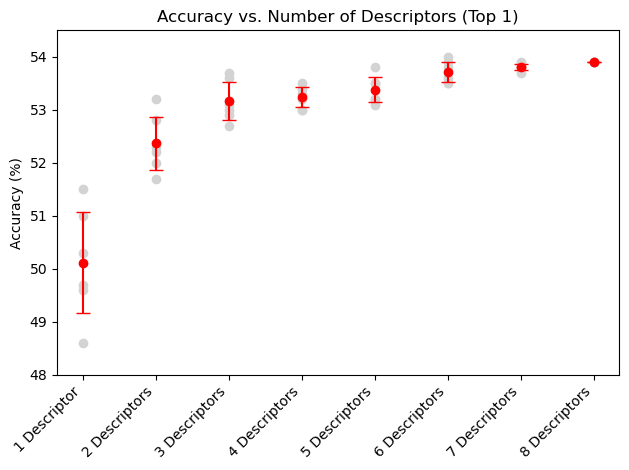

In [27]:
import numpy as np
import matplotlib.pyplot as plt

descriptor_count_vs_acc_dict_top1 = {
    "1 Descriptor": [51.5, 50.3, 49.6, 51.0, 48.6, 49.7],
    "2 Descriptors": [52.0, 52.3, 51.7, 53.2, 52.8, 52.2],
    "3 Descriptors": [53.6, 52.7, 53.1, 53.0, 53.7, 52.9],
    "4 Descriptors": [53.0, 53.3, 53.5, 53.4, 53.2, 53.0],
    "5 Descriptors": [53.5, 53.1, 53.8, 53.2, 53.5, 53.2],
    "6 Descriptors": [53.9, 53.5, 53.6, 54.0, 53.5, 53.8],
    "7 Descriptors": [53.8, 53.8, 53.7, 53.8, 53.8, 53.9],
    "8 Descriptors": [53.9, 53.9, 53.9, 53.9, 53.9, 53.9]
}

# Calculate mean and standard deviation
means = {key: np.mean(values) for key, values in descriptor_count_vs_acc_dict_top1.items()}
std_devs = {key: np.std(values) for key, values in descriptor_count_vs_acc_dict_top1.items()}

# Plotting
fig, ax = plt.subplots()

# Scatter plot for individual data points
for key, values in descriptor_count_vs_acc_dict_top1.items():
    ax.scatter([key]*len(values), values, color='lightgray', alpha=1)

# Scatter plot for means with error bars
ax.errorbar(list(means.keys()), list(means.values()), yerr=list(std_devs.values()), fmt='o', color='red', capsize=5)

# Labels and title
ax.set_ylabel('Accuracy (%)')
ax.set_ylim(48, 54.5)
ax.set_title('Accuracy vs. Number of Descriptors (Top 1)')
ax.set_xticklabels(means.keys(), rotation=45, ha='right')

# Show plot
plt.tight_layout()
plt.show()

/tmp/ipykernel_110524/824256286.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(means.keys(), rotation=45, ha='right')


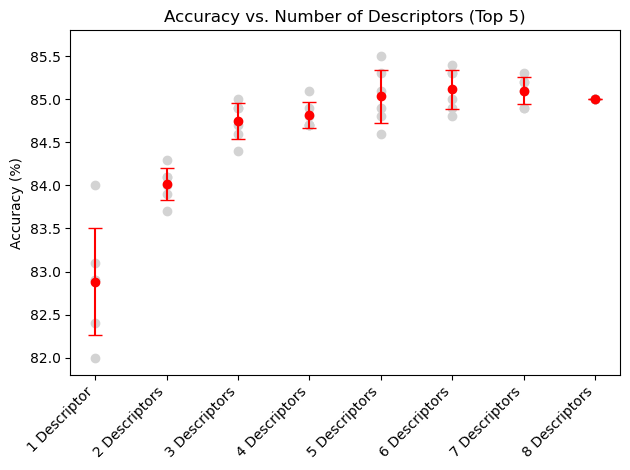

In [31]:
import numpy as np
import matplotlib.pyplot as plt

descriptor_count_vs_acc_dict_top5 = {
    "1 Descriptor": [84.0, 83.1, 82.9, 82.4, 82.0, 82.9],
    "2 Descriptors": [83.9, 83.7, 84.1, 84.3, 84.1, 84.0],
    "3 Descriptors": [84.9, 84.6, 84.4, 84.9, 85.0, 84.7],
    "4 Descriptors": [84.7, 84.9, 84.7, 85.1, 84.8, 84.7],
    "5 Descriptors": [84.8, 85.3, 85.1, 84.6, 85.5, 84.9],
    "6 Descriptors": [85.3, 84.8, 85.4, 85.0, 84.9, 85.3],
    "7 Descriptors": [85.2, 84.9, 85.1, 85.2, 84.9, 85.3],
    "8 Descriptors": [85.0, 85.0, 85.0, 85.0, 85.0, 85.0]
}

# Calculate mean and standard deviation
means = {key: np.mean(values) for key, values in descriptor_count_vs_acc_dict_top5.items()}
std_devs = {key: np.std(values) for key, values in descriptor_count_vs_acc_dict_top5.items()}

# Plotting
fig, ax = plt.subplots()

# Scatter plot for individual data points
for key, values in descriptor_count_vs_acc_dict_top5.items():
    ax.scatter([key]*len(values), values, color='lightgray', alpha=1)

# Scatter plot for means with error bars
ax.errorbar(list(means.keys()), list(means.values()), yerr=list(std_devs.values()), fmt='o', color='red', capsize=5)

# Labels and title
ax.set_ylabel('Accuracy (%)')
ax.set_ylim(81.8, 85.8)
ax.set_title('Accuracy vs. Number of Descriptors (Top 5)')
ax.set_xticklabels(means.keys(), rotation=45, ha='right')

# Show plot
plt.tight_layout()
plt.show()

## Statistics for accuracy vs length of descriptors in dataset
Truncate each descriptor in a dataset by a set percentage and calculate the accuracy of the model testing on the truncated dataset.

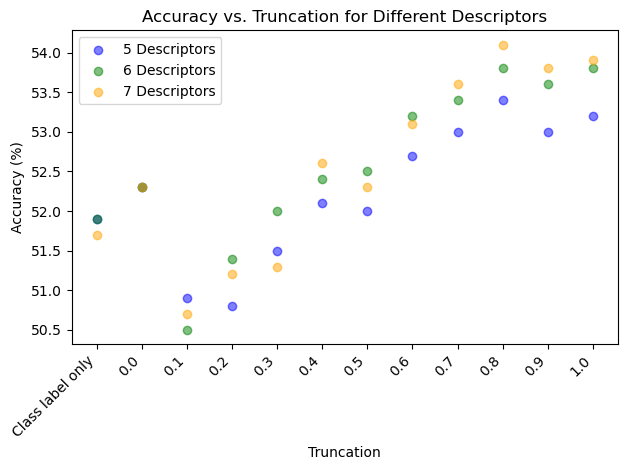

In [50]:
import numpy as np
import matplotlib.pyplot as plt

descriptor_count_vs_truncation_dict = {
    "5 Descriptors": [51.9, 52.3, 50.9, 50.8, 51.5, 52.1, 52.0, 52.7, 53.0, 53.4, 53.0, 53.2],
    "6 Descriptors": [51.9, 52.3, 50.5, 51.4, 52.0, 52.4, 52.5, 53.2, 53.4, 53.8, 53.6, 53.8],
    "7 Descriptors": [51.7, 52.3, 50.7, 51.2, 51.3, 52.6, 52.3, 53.1, 53.6, 54.1, 53.8, 53.9]
}

# Create x-axis labels
x = ["Class label only"] + list(np.round(np.linspace(0, 1.0, 11), 1))

fig, ax = plt.subplots()

colors = ['blue', 'green', 'orange']

for (label, values), color in zip(descriptor_count_vs_truncation_dict.items(), colors):
    ax.scatter(range(1, len(values) + 1), values, color=color, alpha=0.5, label=label)

ax.set_xticks(range(1, len(x) + 1))
ax.set_xticklabels(x, rotation=45, ha='right')
ax.set_xlabel('Truncation')
ax.set_ylabel('Accuracy (%)')
ax.set_title('Accuracy vs. Truncation for Different Descriptors')
ax.legend()

plt.tight_layout()
plt.show()
